### A Hitchhiker's Guide to HyperSpace Results

HyperSpace keeps record of all parallel optimization runs. This is powerful information in that we can explore how our models behave under various hyperparameter spaces. Not only do we discover hyperparameter spaces within which our models perform well, we also find which spaces within which our models perform poorly.

In [10]:
from hyperspace.kepler.plots import plot_convergence
from hyperspace.kepler.data_utils import load_results

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')


%matplotlib inline  

The plotting functions need to have access to the objective function that was minimized. Let's bring that back into view:

In [11]:
def objective(params):
    """
    Objective function to be minimized.
    Parameters
    ----------
    * params [list, len(params)=n_hyperparameters]
        Settings of each hyperparameter for a given optimization iteration.
        - Controlled by hyperspaces's hyperdrive function.
        - Order preserved from list passed to hyperdrive's hyperparameters argument.
    """
    #max_depth, learning_rate, max_features, min_samples_split, min_samples_leaf = params
    max_depth, max_features, min_samples_split, min_samples_leaf = params

    reg.set_params(max_depth=max_depth,
                   #learning_rate=learning_rate,
                   max_features=max_features,
                   min_samples_split=min_samples_split,
                   min_samples_leaf=min_samples_leaf)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [30]:
results = load_results("/home/ygx/dev/jatkaa/hyperspace/examples/results/skopt/space5", sort=True)

In [31]:
best = results.pop(0)

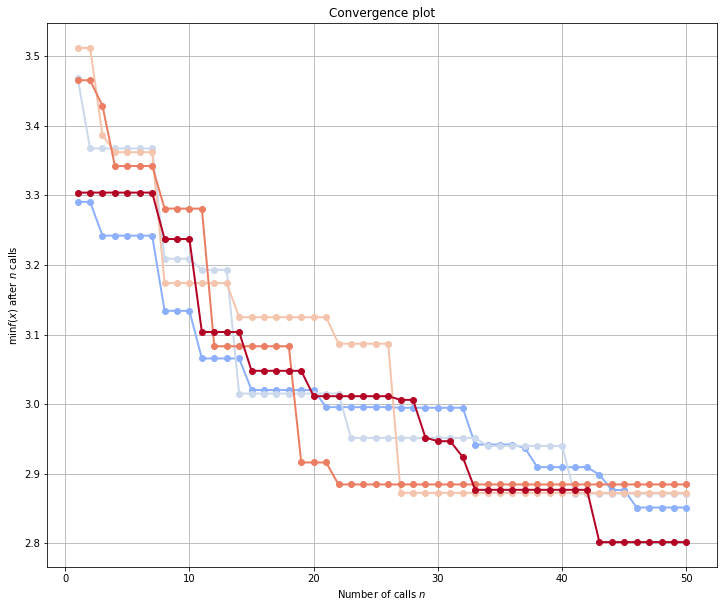

In [32]:
plt.rcParams['figure.figsize'] = [12, 10]

fig = plot_convergence(results[0], results[1], results[2], results[3], best)

In [33]:
fig[0].savefig('top5.png')

In [22]:
fig

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f13457e3278>)

In [24]:
best

          fun: 2.8016424029282865
    func_vals: array([3.30404997, 3.35027075, 3.32825941, 3.48415297, 3.44321412,
       3.34005403, 3.39859337, 3.23729043, 3.5811139 , 3.28270448,
       3.10366178, 3.2222844 , 5.34227548, 5.34680515, 3.04785987,
       3.26745953, 3.19939026, 3.11257132, 3.4094752 , 3.01135887,
       3.93265453, 3.04751869, 3.39915407, 3.0410364 , 3.49111344,
       3.23229748, 3.00610906, 3.02626725, 2.95169884, 2.94667965,
       3.10187969, 2.92387125, 2.8767779 , 2.99722041, 3.2471167 ,
       3.2629639 , 2.87944427, 3.34952282, 2.90357413, 2.98971819,
       3.00861775, 3.01943185, 2.8016424 , 2.89424913, 2.84587234,
       2.90890597, 3.35737839, 3.47963778, 2.89994363, 2.8961309 ])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_b